# ASSIGNMENT 1 - ML DATA CLEANING AND FEATURE SELECTION
##  <span style="color:gray;font-family: Times New Roman"><u>Data Set - FIFA_19 </u></span> 

### Author : Jatin Madan              
### NUID : 2727159

**Problem Statement:** Using a Dataset-FIFA for predictive learning and checking the quality of the data and determining which features are important.

##Abstract 

This dataset contains information about Football player's personal information, the player's overall ranking for some specific criterias in the game, and the Wage of the individual player's which they earn in these Football matches. 


###About the data:

The data is obtained from Kaggle. It consists of 18,207 rows and 18 columns.
It includes several categorical and numeric variables.

ID: Player ID

Name: Player Name

Age: Player's Age

Nationality: Player's Nationality

Overall: Player's Overall Perfomance score

Potential: Player's Potential Perfomance score

Club: Player's Team Name
	
Value: Player's Value Score

Wage: Value of Player's Wage 

Preferred Foot: Player's Foot Game

International Reputation: Player's Internation Rank

Skill Moves: Player's Skill Moves Rank

Position: Player's Overall Position Rank

Joined: Player's Joined Date

Contract Valid Until: Player's Contract valid till date

Height: Player's Height

Weight: Player's Weight

Release Clause: Player's Release Clause Date


## Loading Data

In [127]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from matplotlib import pyplot
import datetime
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import  train_test_split
import eli5
from eli5.sklearn import PermutationImportance

import warnings 
warnings.filterwarnings("ignore")


In [129]:
## Reading the dataset
#df = pd.read_csv('Assignment_1/fifa_eda.csv')
df = pd.read_csv('/content/fifa_eda.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


## Data Types:

In [130]:
df.shape

(18207, 18)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In this Data set there are 2 datatypes 

Numeric datatypes: 
 1.   ID
 2.   Age
 3.   Overall 
 4.   Potential 
 5.   Value
 6.   Wage 
 7.   International Reputation
 8.   Skill Moves
 9.   Joined
 10.  Contract Valid Until
 11.  Height
 12.  Weight
 13.  Release Clause

Categorical datatypes: 
1.  Name
2.  Nationality
3.  Club 
4.  Preferred Foot 
5.  Position




In [132]:
#Converting the datatype of 'Wage' from float64 to int64
df["Wage"]= df["Wage"].astype(int)

## Data Discovery and EDA

In [133]:
# Describe all numerical columns
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


The ranges of all variables in this dataset make sense.



## Missing Values

In [134]:
#Checking the sum of null values in each column
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

**Observations**

• Null values for 'Value' , 'International Reputation' and 'Skilled Moves' were treated through mean values

•	Null values for Club and Contract Valid Until were removed


In [135]:
mean_value=df['Value'].mean()
print (mean_value)

2444.5302144249513


In [136]:
mean_value1=df['International Reputation'].mean()
print (mean_value1)

1.1132220937276283


In [137]:
mean_value2=df['Skill Moves'].mean()
print (mean_value2)

2.361308442094829


In [138]:
# Replacing the null values of 'Value', 'International Reputation' and 'SkillMovies' by the mean values of thier individual means.
df['Value'].fillna(value=mean_value, inplace=True)
df['International Reputation'].fillna(value=mean_value1, inplace=True)
df['Skill Moves'].fillna(value=mean_value2, inplace=True)

In [139]:
# Dropping the null rows ('Club' and 'Contract Valid Until' )
df=df.dropna()

In [140]:
df.isnull()
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

There are no null values in the dataset after replacing the null values.

In [141]:
#Seperating the Year from 'Contract Valid Unitll' and making a seperate column
df['Year'] = pd.DatetimeIndex(df['Contract Valid Until']).year

In [142]:
#Drop 'Contract Valid Until' from the dataset
df.drop(['Contract Valid Until'], axis=1)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Year
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,5.583333,159.0,226500.0,2021
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,6.166667,183.0,127100.0,2022
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,5.750000,150.0,228100.0,2022
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,6.333333,168.0,138600.0,2020
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,5.916667,154.0,196400.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1,Right,1.0,2.0,CM,2017,5.750000,134.0,143.0,2019
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1,Right,1.0,2.0,ST,2018,6.250000,170.0,113.0,2020
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1,Right,1.0,2.0,ST,2017,5.666667,148.0,165.0,2021
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1,Right,1.0,2.0,RW,2018,5.833333,154.0,143.0,2019


In [143]:
#Drop Name column from the dataset. 
df.drop(['Name'], axis=1)

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Year
0,158023,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,2021
1,20801,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,2022
2,190871,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,2022
3,193080,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,2020
4,192985,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,47,65,Crewe Alexandra,60.0,1,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0,2019
18203,243165,19,Sweden,47,63,Trelleborgs FF,60.0,1,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0,2020
18204,241638,16,England,47,67,Cambridge United,60.0,1,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0,2021
18205,246268,17,England,47,66,Tranmere Rovers,60.0,1,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0,2019


## Likely distributions of the numeric variables:


###Density curves 
Plotting density curves for numeric variables.
A density plot is a smoothed, continuous version of a histogram estimated from the data.


x-axis: Variable 


y-axis: Density (frequency with respect to number of instances)

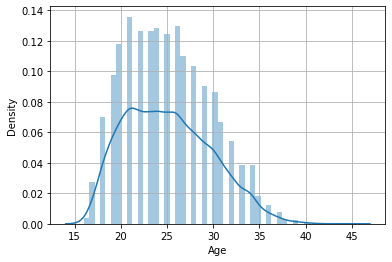

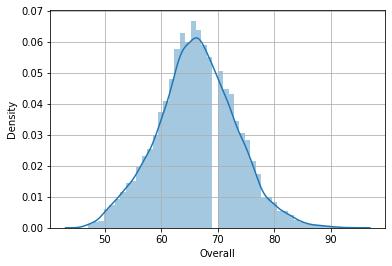

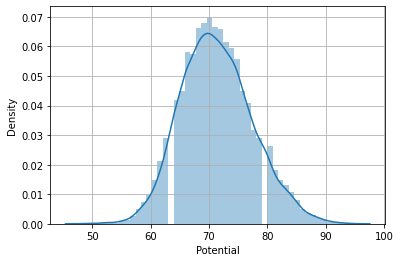

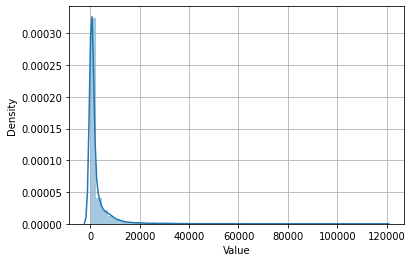

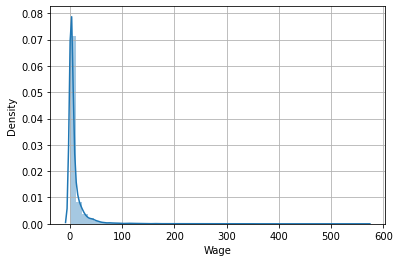

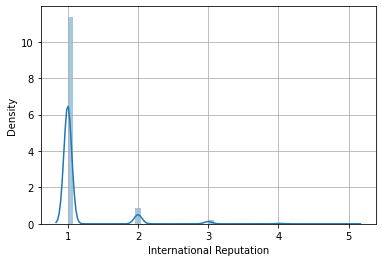

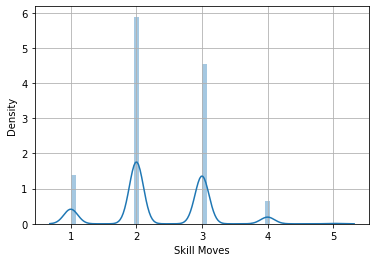

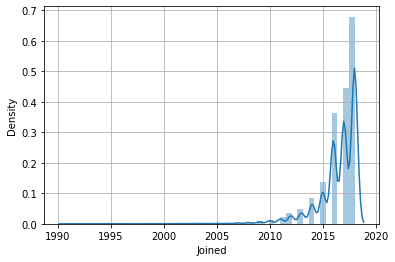

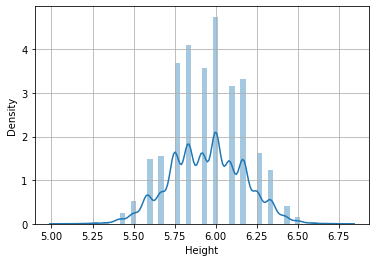

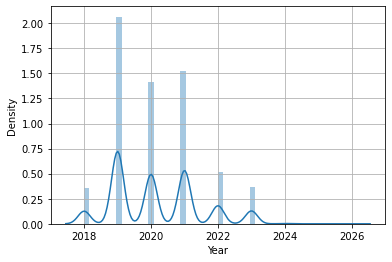

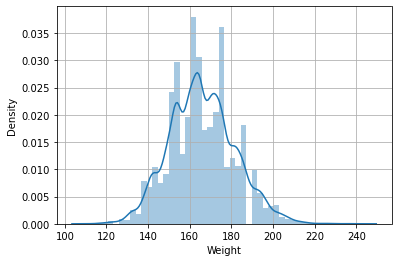

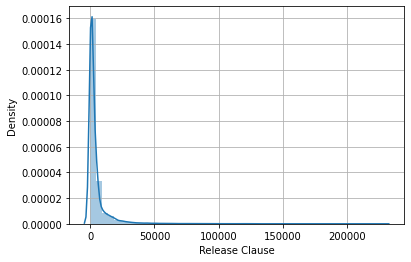

In [144]:
List =['Age','Overall','Potential','Value','Wage','International Reputation','Skill Moves','Joined','Height','Year','Weight','Release Clause']

def distribution(df,list):
  sns.distplot(df[list])
  plt.show()
for i in List:
  plt.grid(True)
  distribution(df,i)
  plt.show()


Using density curves we can visually get an idea of the precentage of samples in different values. 

*Interpretation:(likely to be)*

* Age: Normal distribution 

* Overall: Normal distribution 

* Potential: Normal distribution 

* Value: Right skewed-  distribution

* Wage: Right skewed distribution 

* International Reputation: Right skewed distribution 

* Skill Moves: Multimodal distribution 

* Joined: Multimodal distribution 

* Year: Left distribution

* Height: Normal distribution 

* Weight: Normal distribution

* Release Clause: Right skewed distribution










###**Independent variables which are useful to predict a target were calculated through OLS Regression Method, Correlation Method and P-static and F-static score**

**'Value' was found to be the most important predictor variable.**

##### 1. Using OLS Regression method 

In [145]:
var = sm.OLS(df['Wage'],df[['Age','Overall','Potential','Value','International Reputation',
                            'Skill Moves','Joined','Height','Weight','Release Clause','Year']]).fit()
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              6466.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                        0.00
Time:                        02:57:10   Log-Likelihood:                         -68184.
No. Observations:               17918   AIC:                                  1.364e+05
Df Residuals:                   17907   BIC:                                  1.365e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.2363      0.037      6.419      0.000       0.164       0.309
Overall                     -0.0341      0.034     -1.012      0.312      -0.100       0.032
Potential                    0.0650      0.032      2.036      0.042       0.002       0.128
Value                        0.0031   6.77e-05     45.798      0.000       0.003       0.003
International Reputation     9.6431      0.288     33.540      0.000       9.080      10.207
Skill Moves                 -0.2100      0.140     -1.500      0.134      -0.484       0.064
Joined                      -0.1133      0.037     -3.067      0.002      -0.186      -0.041
Height                       0.7418      0.586      1.266      0.205      -0.406       1.890
Weight                      -0.0032      0.008     -0.385      0.701      -0.020       0.013
Release Clause              -0.0001   3.35e-05     -3.234      0.001      -0.000   -4.26e-05
Year                         0.1034      0.037      2.798      0.005       0.031       0.176
==============================================================================
Omnibus:                    11424.053   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2027060.292
Skew:                           2.044   Prob(JB):                         0.00
Kurtosis:                      54.946   Cond. No.                     9.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will use the p-value from the summary to check the influence of independent variable on target variable. 

In this dataset Wage is the target value.

*Significant variables (p-value < 0.05):*

* Value
* Release Clause 
* International Reputation 
* Joined
* Potential 
* Age
* Wage 
* Year  



##### 2. Using Correlation matrix to find dependency.

In [146]:
df.corr()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause,Year
ID,1.000000,-0.740059,-0.417698,0.047481,-0.139062,-0.204988,-0.355581,-0.057347,0.208455,-0.088962,-0.190523,-0.121957,0.143533
Age,-0.740059,1.000000,0.453252,-0.252799,0.078175,0.143944,0.254064,0.028737,-0.203358,0.082072,0.229824,0.059075,-0.125260
Overall,-0.417698,0.453252,1.000000,0.660850,0.631258,0.575940,0.501142,0.415865,-0.170142,0.038241,0.154095,0.600857,0.173491
Potential,0.047481,-0.252799,0.660850,1.000000,0.579099,0.488999,0.374155,0.354908,-0.048755,-0.010101,-0.007664,0.566161,0.268874
Value,-0.139062,0.078175,0.631258,0.579099,1.000000,0.858002,0.655455,0.317126,-0.115834,0.002827,0.046692,0.973491,0.223159
Wage,-0.204988,0.143944,0.575940,0.488999,0.858002,1.000000,0.670736,0.264344,-0.144047,0.019836,0.065545,0.829404,0.151016
International Reputation,-0.355581,0.254064,0.501142,0.374155,0.655455,0.670736,1.000000,0.208307,-0.133809,0.034891,0.088427,0.622710,0.071478
Skill Moves,-0.057347,0.028737,0.415865,0.354908,0.317126,0.264344,0.208307,1.000000,0.020397,-0.422671,-0.350936,0.299407,0.088100
Joined,0.208455,-0.203358,-0.170142,-0.048755,-0.115834,-0.144047,-0.133809,0.020397,1.000000,0.001214,-0.028315,-0.115415,0.095189
Height,-0.088962,0.082072,0.038241,-0.010101,0.002827,0.019836,0.034891,-0.422671,0.001214,1.000000,0.754278,0.001847,-0.012136


In [147]:
df_new = df[['Value', 'Release Clause', 'International Reputation', 'Joined', 'Potential', 'Age','Wage','Year']]

df_new.corr()

,Value,Release Clause,International Reputation,Joined,Potential,Age,Wage,Year
Value,1.000000,0.973491,0.655455,-0.115834,0.579099,0.078175,0.858002,0.223159
Release Clause,0.973491,1.000000,0.622710,-0.115415,0.566161,0.059075,0.829404,0.232525
International Reputation,0.655455,0.622710,1.000000,-0.133809,0.374155,0.254064,0.670736,0.071478
Joined,-0.115834,-0.115415,-0.133809,1.000000,-0.048755,-0.203358,-0.144047,0.095189
Potential,0.579099,0.566161,0.374155,-0.048755,1.000000,-0.252799,0.488999,0.268874
Age,0.078175,0.059075,0.254064,-0.203358,-0.252799,1.000000,0.143944,-0.125260
Wage,0.858002,0.829404,0.670736,-0.144047,0.488999,0.143944,1.000000,0.151016
Year,0.223159,0.232525,0.071478,0.095189,0.268874,-0.125260,0.151016,1.000000


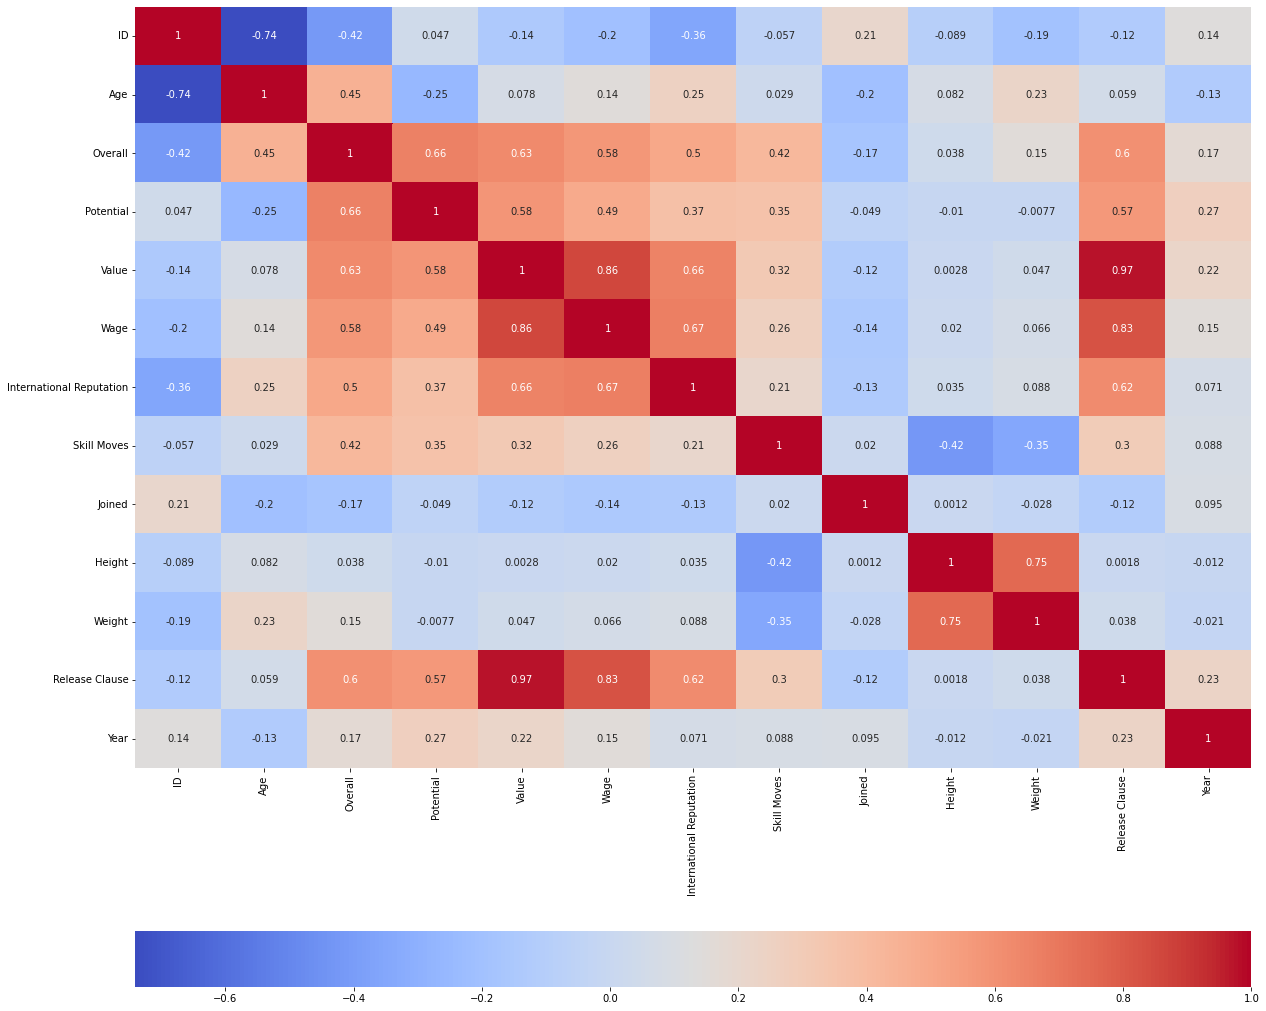

In [148]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', cbar_kws= {'orientation': 'horizontal'} , fmt='.2g')
plt.show()




In our dataset: Wage is the target variable

Therefore, the impact of independent variables on the prediction of target variable is as follows: (least to most)


1. Value                       (0.86)
2. Release Clause              (0.83)
3. International Reputation    (0.67)
4. Overall                     (0.58)
5. Potential                   (0.49)
6. Skill Moves                 (0.26)
7. Age                         (0.14)
8. Height                      (0.02)
9. Weight                      (0.07)
10. Joined                    (-0.14)





**In this Dataset, the predictor variables are not independent of each other.**

**Value, Release Clause, International Reputation, Joined, Potential, Age and Year are the significant variables.**

**Value and Release Clause (0.97) are dependent on each other.**



##### 3. Selecting features based on P-Static and F-Static scores

In [149]:
from sklearn.feature_selection import f_regression

column_means = df.mean()
df.fillna(column_means, inplace=True)
X_fs = df.drop(['Wage','Name','Nationality','Club','Preferred Foot','Position','Contract Valid Until'], axis = 1)
y_fs = df['Wage']

f_val, p_val = f_regression(X_fs, y_fs)

f_regression(X_fs, y_fs)

(array([7.85851444e+02, 3.79071362e+02, 8.89259478e+03, 5.63041504e+03,
        4.99905355e+04, 1.46518542e+04, 1.34598134e+03, 3.79626842e+02,
        7.05192522e+00, 7.73025083e+01, 3.94906795e+04, 4.18127512e+02]),
 array([2.84525786e-169, 1.44678355e-083, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 3.42768724e-284, 1.10147332e-083,
        7.92501645e-003, 1.59738244e-018, 0.00000000e+000, 6.97139070e-092]))

In [150]:
import math

f_val_dict = {}
p_val_dict = {}
for i in range(len(f_val)):
    if math.isnan(f_val[i]):
        f_val[i] = 0.0
    f_val_dict[i] = f_val[i]
    if math.isnan(p_val[i]):
        p_val[i] = 0.0
    p_val_dict[i] = p_val[i]


for idx, col in enumerate(df.columns):
  if idx in f_val_dict:
    print(col, "F-Static is :", f_val_dict[idx], ", P Static is :", p_val_dict[idx])

ID F-Static is : 785.8514437424675 , P Static is : 2.845257855081311e-169
Name F-Static is : 379.07136218318294 , P Static is : 1.4467835547594525e-83
Age F-Static is : 8892.594775837051 , P Static is : 0.0
Nationality F-Static is : 5630.41503819316 , P Static is : 0.0
Overall F-Static is : 49990.53548259105 , P Static is : 0.0
Potential F-Static is : 14651.854215599076 , P Static is : 0.0
Club F-Static is : 1345.9813445474654 , P Static is : 3.427687235060734e-284
Value F-Static is : 379.62684196868815 , P Static is : 1.1014733194090377e-83
Wage F-Static is : 7.051925215984649 , P Static is : 0.007925016454875037
Preferred Foot F-Static is : 77.30250827073344 , P Static is : 1.59738244455868e-18
International Reputation F-Static is : 39490.679474687175 , P Static is : 0.0
Skill Moves F-Static is : 418.12751196347307 , P Static is : 6.971390697981227e-92


# Splitting Data into train and test

#### Test and Train were splitted into Train 75% and Train 25% and data is same

Train-Valid-Test split is a technique to evaluate the performance of your machine learning model — classification or regression alike. You take a given dataset and divide it into three subsets.

Train Data: Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model
Validation Data:

Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters

Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection

Test Data: Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset

In [151]:
X = df[['ID','Age','Overall','Potential','Value','International Reputation','Skill Moves',
        'Joined','Height','Year','Weight','Release Clause']]

y = df['Wage']

#spliting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [152]:
X

,ID,Age,Overall,Potential,Value,International Reputation,Skill Moves,Joined,Height,Year,Weight,Release Clause
0,158023,31,94,94,110500.0,5.0,4.0,2004,5.583333,2021,159.0,226500.0
1,20801,33,94,94,77000.0,5.0,5.0,2018,6.166667,2022,183.0,127100.0
2,190871,26,92,93,118500.0,5.0,5.0,2017,5.750000,2022,150.0,228100.0
3,193080,27,91,93,72000.0,4.0,1.0,2011,6.333333,2020,168.0,138600.0
4,192985,27,91,92,102000.0,4.0,4.0,2015,5.916667,2023,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,60.0,1.0,2.0,2017,5.750000,2019,134.0,143.0
18203,243165,19,47,63,60.0,1.0,2.0,2018,6.250000,2020,170.0,113.0
18204,241638,16,47,67,60.0,1.0,2.0,2017,5.666667,2021,148.0,165.0
18205,246268,17,47,66,60.0,1.0,2.0,2018,5.833333,2019,154.0,143.0


In [153]:
y

0        565
1        405
2        290
3        260
4        355
        ... 
18202      1
18203      1
18204      1
18205      1
18206      1
Name: Wage, Length: 17918, dtype: int64

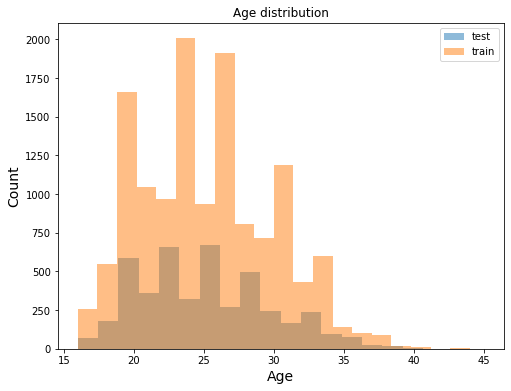

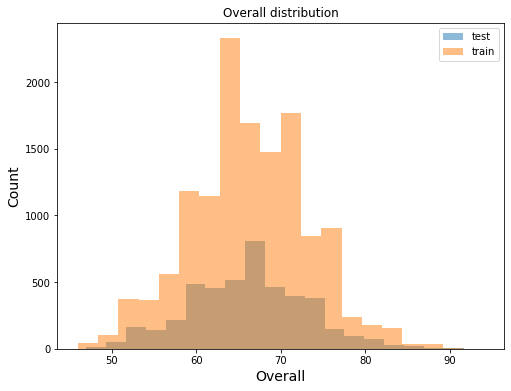

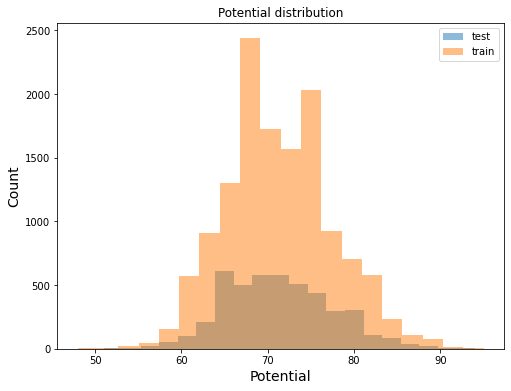

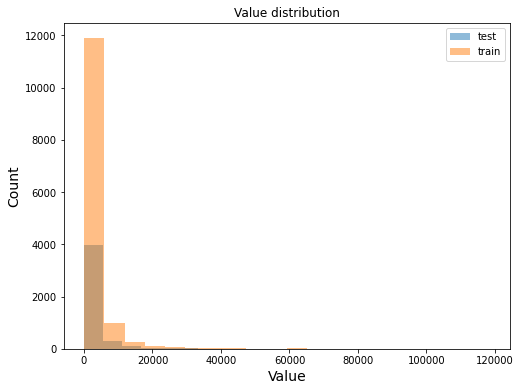

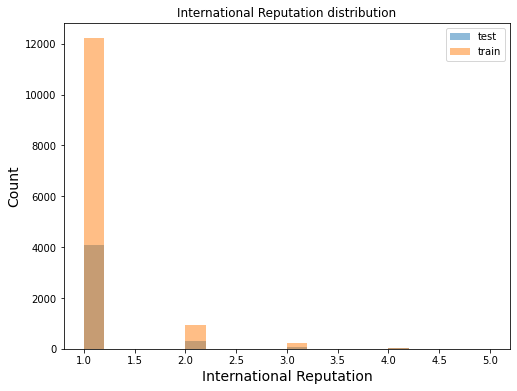

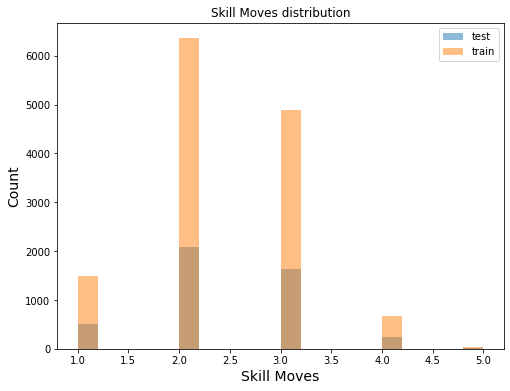

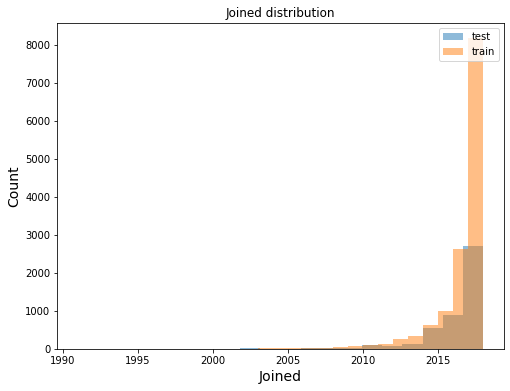

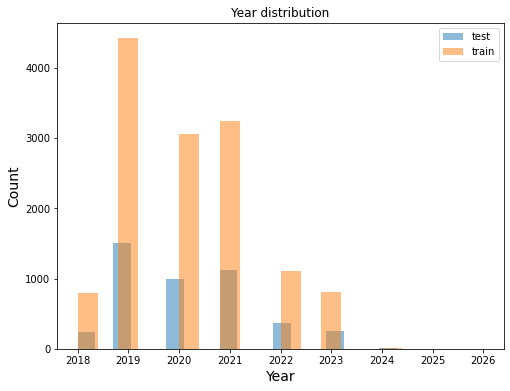

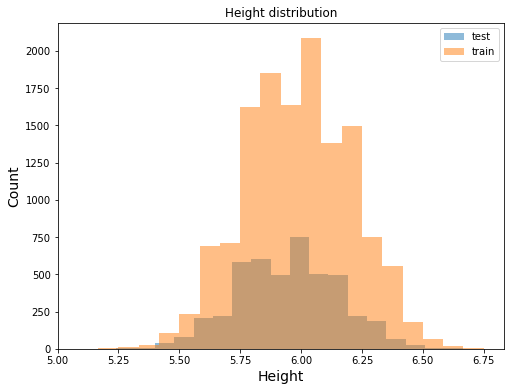

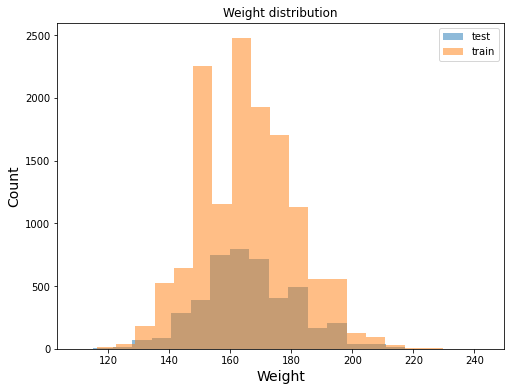

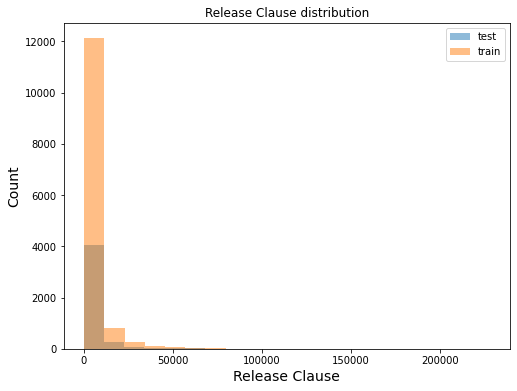

In [154]:
X_test_plot = X_test[['Age','Overall','Potential','Value','International Reputation','Skill Moves',
        'Joined','Year','Height','Weight','Release Clause']]

X_train_plot = X_train[['Age','Overall','Potential','Value','International Reputation','Skill Moves',
        'Joined','Year','Height','Weight','Release Clause']]

# Plotting the data to see the histogram of train and text data 
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

**By looking at the graphs, we observe similar distribution in the train and test data. So it can be infered that they have the same data.**

###Logistic regression and model accuracy 

In [155]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [156]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [157]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 117.33
Coefficient of determination: 0.75
R^2 score on tarining set = 0.749385511568635


#Understanding the important features 

In [159]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.8424 ± 0.0292,Value
0.0722 ± 0.0063,International Reputation
0.0141 ± 0.0013,Release Clause
0.0015 ± 0.0003,Joined
0.0015 ± 0.0005,Overall
0.0009 ± 0.0005,Age
0.0008 ± 0.0002,Potential
0.0001 ± 0.0008,Year
0.0000 ± 0.0002,Height
0.0000 ± 0.0001,Weight


**Value is the most Important feature.**

##Using BoxPlots to identify Outliers. 

It captures the summary of the data effectively and efficiently with only a simple box and whiskers.

Outliers:

Outliers were found in Value , Release Clause, Wage and Potential but due to dynamics/segmententaions of players as high segmented players had higher performances thus we can not remove it.

Whereas Oultiers Joined and Age were removed following the IQR method 

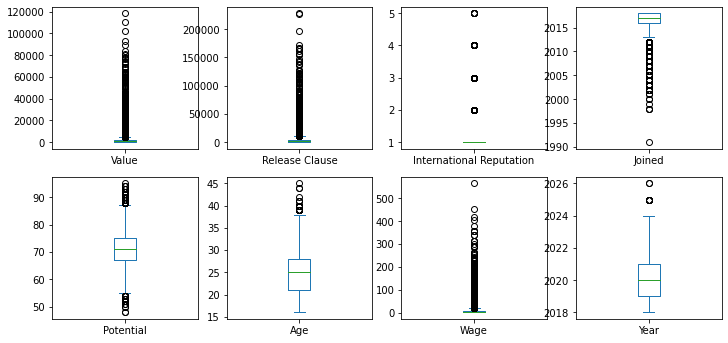

In [198]:
df[['Value', 'Release Clause', 'International Reputation', 'Joined', 'Potential', 'Age','Wage','Year']].plot(kind='box', figsize=(12,12), layout=(4,4),sharex=False, subplots=True);

In [199]:
df1[['Value', 'Release Clause', 'Joined', 'Potential', 'Age','Wage']].quantile(np.arange(0.9, 1.0001, 0.001))

,Value,Release Clause,Joined,Potential,Age,Wage
0.900,6500.0,10700.0,2018.0,79.0,31.0,23.00
0.901,6500.0,10800.0,2018.0,80.0,31.0,23.00
0.902,6500.0,10900.0,2018.0,80.0,31.0,23.00
0.903,6500.0,11000.0,2018.0,80.0,31.0,23.00
0.904,6500.0,11100.0,2018.0,80.0,31.0,24.00
...,...,...,...,...,...,...
0.996,36500.0,69406.4,2018.0,89.0,37.0,140.00
0.997,41512.0,77024.0,2018.0,89.0,38.0,165.00
0.998,51016.0,90576.8,2018.0,90.0,38.0,195.00
0.999,63008.0,123200.8,2018.0,91.0,39.0,230.04


Removing the Outliers from Joined

In [200]:
from numpy.lib.function_base import quantile
quantile(df[['Joined']],q = np.arange(0.01,1,0.01))
df[['Joined']].quantile(np.arange(0, 1, 0.05))

,Joined
0.00,1991.0
0.05,2012.0
0.10,2014.0
0.15,2015.0
0.20,2016.0
0.25,2016.0
0.30,2016.0
0.35,2016.0
0.40,2017.0
0.45,2017.0


In [201]:
#IQR-Inter Quartile Range
Q1 = np.percentile(df['Joined'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(df['Joined'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Shape Before removing Outliers: ", df.shape)
 

Shape Before removing Outliers:  (17918, 19)


In [202]:
np.percentile(df.Joined, 25)  # Q1

2016.0

In [203]:
np.percentile(df.Joined, 50)  # median


2017.0

In [204]:
np.percentile(df.Joined, 75)  # Q3

2018.0

In [205]:
#upper bound
upper_boundary = (Q3+1.5*IQR)
print(upper_boundary)
# Lower bound
lower_boundary = (Q1-1.5*IQR)
print(lower_boundary)

2021.0
2013.0


In [206]:
upper = np.where(df['Joined'] >= (+1.5*IQR))
# Lower bound
lower = np.where(df['Joined'] <= (Q1-1.5*IQR))

In [207]:
lower

(array([    0,     3,     5, ..., 17858, 17882, 17891]),)

In [208]:
df1= df[df.Joined >= 2013]

In [209]:
df1.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause,Year
count,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000
mean,215444.075009,24.896282,66.049653,71.337098,2348.541133,9.353453,1.104365,2.366455,2016.770620,5.947175,165.893223,4393.198095,2020.148017
std,29179.570037,4.612132,6.885331,6.103279,5260.784167,19.894530,0.372849,0.753035,1.311124,0.220659,15.572175,9975.966871,1.292162
min,16.000000,16.000000,46.000000,48.000000,10.000000,1.000000,1.000000,1.000000,2013.000000,5.083333,110.000000,13.000000,2018.000000
25%,201439.000000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,561.000000,2019.000000
50%,222995.500000,24.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000,2020.000000
75%,237101.000000,28.000000,71.000000,75.000000,2000.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806,2021.000000
max,246620.000000,44.000000,94.000000,95.000000,118500.000000,455.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000,2026.000000


Removing the Outliers from Age

In [210]:
#IQR-Inter Quartile Range
Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')

IQR1 = Q3 - Q1
 
print("Shape Before removing Outliers: ", df.shape)
 

Shape Before removing Outliers:  (17918, 19)


In [211]:
np.percentile(df.Age, 25)  # Q11

21.0

In [212]:
np.percentile(df.Age, 50)  # Median

25.0

In [213]:
np.percentile(df.Age, 75)  # Q33

28.0

In [214]:
#upper bound
upper_boundary_age = (Q3+1.5*IQR)
print(upper_boundary_age)
# Lower bound
lower_boundary_age = (Q1-1.5*IQR)
print(lower_boundary_age)

31.0
18.0


Based on Box Plot conisdering Age below 40

In [215]:
#Remove outliers for Age
df1= df1[df1.Age <= 40]

# Checking model accuracy after removing outliers

In [179]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [180]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [181]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 117.33
Coefficient of determination: 0.75
R^2 score on tarining set = 0.749385511568635


# Data Imputation

## 3 methods of filling values:
1. Replacing nulls in few columns with the mean
2. Replacing nulls in few columns with the mode (most frequent value)
3. Replacing nulls in few columns with zeroes

## For 1% randomly removed data

In [182]:
df_2 = df.copy()

#removing 1% data from column 
df_percent=df_2['Potential'].sample(frac = 0.01)

#using location of fraction data to set null
df_2['Potential'].loc[df_2.index.isin(df_percent.index)]=np.NaN

In [183]:
#Count of null values in Income row 
df_2['Potential'].isnull().sum()

179

Using median imputtation method to replace null values 




In [184]:
df_2['Potential']=df_2['Potential'].fillna(df_2['Potential'].median())

In [185]:
df_2

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Year
0,158023,L. Messi,31,Argentina,94,94.0,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,2021
1,20801,Cristiano Ronaldo,33,Portugal,94,94.0,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,2022
2,190871,Neymar Jr,26,Brazil,92,93.0,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,2022
3,193080,De Gea,27,Spain,91,93.0,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,2020
4,192985,K. De Bruyne,27,Belgium,91,92.0,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65.0,Crewe Alexandra,60.0,1,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0,2019
18203,243165,N. Christoffersson,19,Sweden,47,63.0,Trelleborgs FF,60.0,1,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0,2020
18204,241638,B. Worman,16,England,47,67.0,Cambridge United,60.0,1,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0,2021
18205,246268,D. Walker-Rice,17,England,47,66.0,Tranmere Rovers,60.0,1,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0,2019


In [186]:
#checking recovery after median imputation in column 

df_2.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
Year                        0
dtype: int64

Using Mean imputation method to replace null values

## For 5% randomly removed data

In [187]:
df_5 = df.copy()

#removing 5% data from column 
df_percent5=df_5['Weight'].sample(frac = 0.05)

#using location of fraction data to set null
df_5['Weight'].loc[df_5.index.isin(df_percent5.index)]=np.NaN

In [188]:
#check number of null values created
df_5.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation      0
Skill Moves                   0
Position                      0
Joined                        0
Contract Valid Until          0
Height                        0
Weight                      896
Release Clause                0
Year                          0
dtype: int64

In [189]:
df_5['Weight']=df_5['Weight'].fillna(df_2['Weight'].mean())

In [190]:
df_5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Year
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,165.968858,226500.0,2021
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.000000,127100.0,2022
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.000000,228100.0,2022
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.000000,138600.0,2020
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.000000,196400.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.000000,143.0,2019
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.000000,113.0,2020
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.000000,165.0,2021
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.000000,143.0,2019


In [191]:
df_5.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
Year                        0
dtype: int64

## For 10% randomly removed data

In [192]:
#Removing 10% data
df_10 = df.copy()

#removing 5% data from column 
df_percent10=df_10['Height'].sample(frac = 0.1)

#using location of fraction data to set null
df_10['Height'].loc[df_10.index.isin(df_percent10.index)]=np.NaN

In [193]:
#check number of null values created
df_10.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Skill Moves                    0
Position                       0
Joined                         0
Contract Valid Until           0
Height                      1792
Weight                         0
Release Clause                 0
Year                           0
dtype: int64

In [194]:
df_10['Height']=df_5['Height'].fillna(df_2['Height'].mode())

In [195]:
df_10.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
Year                        0
dtype: int64

**Using median, mean and mode imputaton methods all the Null values were replaced.**

#**Conclusion**

Using the analysis done in this notebook, we can infere all independent variables are significant and that 'Value' has highest effect on determining the Wage of the player.

##References 

1. ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
2. Python Data Science Handbook
3. Sckit learn offcial documentation
4. mlxtend documentation
5. Analytics Vidhya 

Refered to the sample notebook (Abalone dataset) to undertsand expected assignment format. 

Used Sckitlearn tools to implement models. Used mlxtend for bias and variance. Used eli5 to predict and understand feature importance. 

Refered to Analytics Vidhya and Python Data science Handbook to study different models and concepts. 

Copyright 2022 *Jatin Madan*

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.